In [1]:
%load_ext autoreload
%autoreload 2

pattern = "pattern-4"

entrypoint = pattern
app_cwl_file = f'../cwl-workflow/{pattern}.cwl'

try: 
    from docs.helpers import plot_cwl, wrap_cwl
except (ImportError, ModuleNotFoundError) as e:

    import os
    import sys
    module_path = os.path.abspath(os.path.join('.')) # or the path to your source code
    sys.path.insert(0, module_path)

from helpers import WorkflowViewer, WorkflowWrapper
from eoap_cwlwrap.loader import dump_workflow
from pathlib import Path

/home/fbrito/.local/share/hatch/env/virtual/patterns/VcrZkRRN/patterns/lib/python3.13/site-packages/cwl_wrapper/parser.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:

wf = WorkflowViewer(app_cwl_file, entrypoint=entrypoint)

## Application Package Pattern 4

The CWL includes: 

- one input parameter of type `Directory`
- two output parameters of type `Directory`

This scenario takes as input an acquisition, applies two algorithms and generates two outputs.

Implementation: process the NDVI and NDWI taking as input a Landsat-8/9 acquisition. The output include two STAC Catalogs, each with a single STAC Item

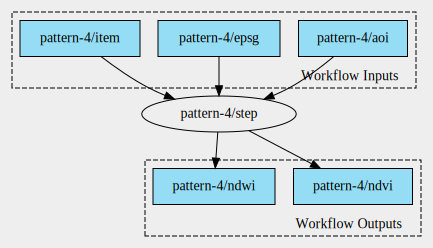

In [3]:
wf.plot()

### Inputs

In [4]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | string | area of interest | area of interest as a bounding box |
| `epsg` | string | EPSG code | EPSG code |
| `item` | Directory | Landsat-8/9 acquisition reference | Landsat-8/9 acquisition reference |


### Steps

In [5]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `step` | file:///#clt | None | None |


### Outputs

In [6]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `ndvi` | Directory | NDVI vegetation index | NDVI vegetation index |
| `ndwi` | Directory | NDWI vegetation index | NDWI vegetation index |


## Data flow management

In [7]:
w = WorkflowWrapper(app_cwl_file, entrypoint=entrypoint)
output_path = Path(f".{entrypoint}.cwl")
with output_path.open("w") as f:
     dump_workflow(w.wrap(), f)

Loading CWL document from ../cwl-workflow/pattern-4.cwl...
Raw CWL document successfully loaded from ../cwl-workflow/pattern-4.cwl! Now updating the model to v1.2...
Raw CWL document successfully updated! Now converting to the CWL model...
Raw CWL document successfully updated! Now dereferencing the FQNs...
  Cleaning Workflow pattern-4...
  Cleaning CommandLineTool clt...
CWL document successfully dereferenced!
Loading CWL document from https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/main/templates/stage-in.cwl...
Raw CWL document successfully loaded from https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/main/templates/stage-in.cwl! Now updating the model to v1.2...
Raw CWL document successfully updated! Now converting to the CWL model...
Raw CWL document successfully updated! Now dereferencing the FQNs...
  Cleaning CommandLineTool my-asthonishing-stage-in-directory...
CWL document successfully dereferenced!
Loading CWL docu

In [8]:
app_cwl_file = f'.{entrypoint}.cwl'

wf = WorkflowViewer(app_cwl_file, entrypoint="main")

In [9]:
wf.plot()

### Inputs

In [10]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | string | area of interest - pattern-4/aoi | area of interest as a bounding box - This parameter is derived from pattern-4/aoi |
| `epsg` | string | EPSG code - pattern-4/epsg | EPSG code - This parameter is derived from pattern-4/epsg |
| `another_input` | string | Another Input - my-asthonishing-stage-in-directory/another_input | An additional input for demonstration purposes - This parameter is derived from my-asthonishing-stage-in-directory/another_input |
| `item` | https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI | Landsat-8/9 acquisition reference - pattern-4/item | Landsat-8/9 acquisition reference - This parameter is derived from pattern-4/item |
| `s3_bucket` | string | my-super-stage-out/s3_bucket | This parameter is derived from: my-super-stage-out/s3_bucket |
| `sub_path` | string | my-super-stage-out/sub_path | This parameter is derived from: my-super-stage-out/sub_path |
| `aws_access_key_id` | string | my-super-stage-out/aws_access_key_id | This parameter is derived from: my-super-stage-out/aws_access_key_id |
| `aws_secret_access_key` | string | my-super-stage-out/aws_secret_access_key | This parameter is derived from: my-super-stage-out/aws_secret_access_key |
| `region_name` | string | my-super-stage-out/region_name | This parameter is derived from: my-super-stage-out/region_name |
| `endpoint_url` | string | my-super-stage-out/endpoint_url | This parameter is derived from: my-super-stage-out/endpoint_url |


### Steps

In [11]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `directory_stage_in_0` | file:///#my-asthonishing-stage-in-directory | None | None |
| `app` | file:///#pattern-4 | None | None |
| `stage_out_0` | file:///#my-super-stage-out | None | None |
| `stage_out_1` | file:///#my-super-stage-out | None | None |


### Outputs

In [12]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `ndvi` | https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI | NDVI vegetation index | NDVI vegetation index |
| `ndwi` | https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI | NDWI vegetation index | NDWI vegetation index |
